# Complete EDA of Google Play Store App Data Analysis

Author: Muhammad Afaq\
Email: mafaqahmad074@gmail.com\
kaggle Account: [link](https://www.kaggle.com/muhammadafaq786)\
LinkedIn Account: [link](https://www.linkedin.com/in/muhammad-afaq-967b27238)





## About Dataset
**Context**\
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

**Content**\
Each app (row) has values for catergory, rating, size, and more.

**Acknowledgements**\
This information is scraped from the Google Play Store. This app information would not be available without it.

**Inspiration**
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# 1. Import Libraries


In [2]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# 2. Load Data for Exploration and Cleaning


- load the data

In [3]:
# read the data
df = pd.read_csv('Datasets\googleplaystore.csv')

- See the first five rows of Data

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [5]:
# See the all row and columns of data
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)

# hide all warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# see columns names
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
# check the shape of the data nbr of row and columns
df.shape

(10841, 13)

In [8]:
# using f string to print the shape of the data
print(f"The Number of Rows in the data is: {df.shape[0]}")
print(f"The Number of Columns in the data is: {df.shape[1]}")

The Number of Rows in the data is: 10841
The Number of Columns in the data is: 13


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [10]:
# check the mumeric columns
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


In [11]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

# 3.How to make a size in mumeric columns

--- 
### Three type of Observation in this data
1. Varies with device
2. M
3. K
---

In [12]:
# check the missing values
df['Size'].isnull().sum()

0

In [13]:
df['Size'].isnull().sum()

0

- No missing values in size column go to go forward

### Verify the nbr of values and three different kind of values

In [14]:
# find the value having M in them 
print(df['Size'].loc[df['Size'].str.contains("M")].value_counts().sum())

# find the value having k in them
print(df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum())   

# Find the value having Varies with device
print(df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum())   

8830
316
1695


In [15]:
print(8830 + 316 + 1695)
print(len(df))

10841
10841


In [16]:
# convert the whole column into bytes
 # create a function to convert the size into bytes
def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', " ")) * 1024
        elif 'M' in size:
            return float(size.replace('M', " ")) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
        return size


In [17]:
# let apply this funcation
df['Size'] = df['Size'].apply(convert_size)


In [18]:
df['Size']

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               NaN
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               NaN
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

In [19]:
# rename the size columna
df.rename(columns={'Size' : 'Size_in_Bytes'}, inplace=True)
df.head(2)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up


In [20]:
# covert size in bytes into MB
df['Size_in_MB'] = df['Size_in_Bytes'].apply(lambda x: x/(1024*1024))
df.head(2)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,14.0


In [21]:
# convert into kb
df['Size_in_KB'] = df['Size_in_Bytes'].apply(lambda x: x/1024)
df.head(2)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB,Size_in_KB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,14.0,14336.0


# Check the Install Columns and Lets Care
--- 
# Observation
1. remove + sign
2. remove ,
3. convert into integer 
---

In [22]:
df['Installs'].unique()
print(df['Installs'].isnull().sum())

0


In [23]:
# remove the + sign and , from the column using lambda function
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '')if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '')if ',' in str(x) else x)

# convert the column into integer using lambda function
df['Installs'] = df['Installs'].apply(lambda x: int(x))


In [24]:
# convert the column into integer using astype function
df['Installs'] = df['Installs'].astype(int)

In [25]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

# Price Columns take care

In [26]:
df['Price'].value_counts()

Price
0           10041
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$29.99          7
$24.99          7
$3.49           7
$7.99           7
$5.49           6
$19.99          6
$11.99          5
$6.49           5
$12.99          5
$8.99           5
$10.00          3
$16.99          3
$1.00           3
$2.00           3
$13.99          2
$8.49           2
$17.99          2
$1.70           2
$3.95           2
$79.99          2
$7.49           2
$9.00           2
$10.99          2
$39.99          2
$33.99          2
$1.96           1
$19.40          1
$4.80           1
$3.28           1
$4.59           1
$15.46          1
$3.04           1
$4.29           1
$2.60           1
$2.59           1
$3.90           1
$154.99         1
$4.60           1
$28.99          1
$2.95           1
$2.90           1
$1.9

In [27]:
# let's see how many value have a $ sign
print(df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum())

# show the value having a 0 value but canot show tha value having a $ sign
print(df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum())

800
10041


In [28]:
# remove the $ sign from the column
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '')if '$' in str(x) else x)
df['Price']

0              0
1              0
2              0
3              0
4              0
5              0
6              0
7              0
8              0
9              0
10             0
11             0
12             0
13             0
14             0
15             0
16             0
17             0
18             0
19             0
20             0
21             0
22             0
23             0
24             0
25             0
26             0
27             0
28             0
29             0
30             0
31             0
32             0
33             0
34             0
35             0
36             0
37             0
38             0
39             0
40             0
41             0
42             0
43             0
44             0
45             0
46             0
47             0
48             0
49             0
50             0
51             0
52             0
53             0
54             0
55             0
56             0
57             0
58            

In [29]:
df.describe()

,Rating,Reviews,Size_in_Bytes,Installs,Size_in_MB,Size_in_KB
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,9146.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,21.514141,22030.480308
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,22.588679,23130.807322
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,13.000000,13312.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,30.000000,30720.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000,102400.000000


In [30]:
# using f string print mix, max and mean of the price
print(f"The Minimum Price of the App is: {df['Price'].min()}")
print(f"The Maximum Price of the App is: {df['Price'].max()}")


The Minimum Price of the App is: 0
The Maximum Price of the App is: 9.99 


# Find missing Values in DataFrame


In [31]:
# show missing values
df.isnull().sum().sort_values(ascending=False)

Size_in_Bytes     1695
Size_in_MB        1695
Size_in_KB        1695
Rating            1474
Current Ver          8
Android Ver          2
Category             1
Type                 1
Genres               1
App                  0
Reviews              0
Installs             0
Price                0
Content Rating       0
Last Updated         0
dtype: int64

In [32]:
# find missing percentage in dataframe
round(df.isnull().sum().sort_values(ascending=False)/len(df)*100, 2).sort_values(ascending=False)


Size_in_Bytes     15.64
Size_in_MB        15.64
Size_in_KB        15.64
Rating            13.60
Current Ver        0.07
Android Ver        0.02
Category           0.01
Type               0.01
Genres             0.01
App                0.00
Reviews            0.00
Installs           0.00
Price              0.00
Content Rating     0.00
Last Updated       0.00
dtype: float64

In [33]:
# total number of missing values in DataFrame
df.isnull().sum().sum()

6572

<Axes: >

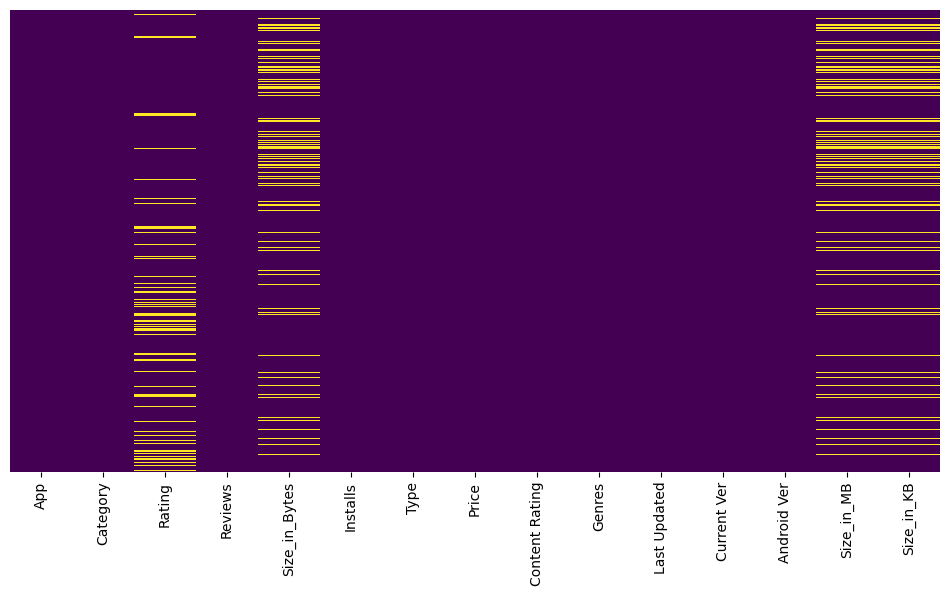

In [34]:
# plot missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

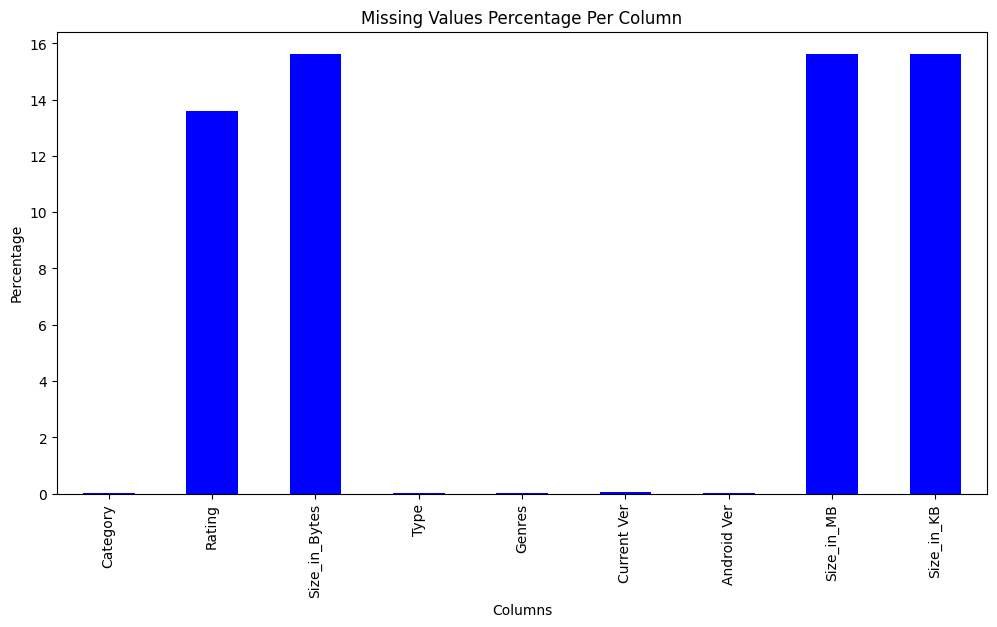

In [35]:
# plot the missing value percentage
plt.figure(figsize=(12, 6))
missing = df.isnull().sum()/len(df)*100
missing = missing[missing > 0] # show the value greater than 0
missing.plot(kind='bar', color='blue')
plt.title('Missing Values Percentage Per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.show()


In [42]:
# Find Unique app categories
unique_categories = df['Category'].unique()
print(f'Total Number of Unique Categories: {len(unique_categories)}')


Total Number of Unique Categories: 34


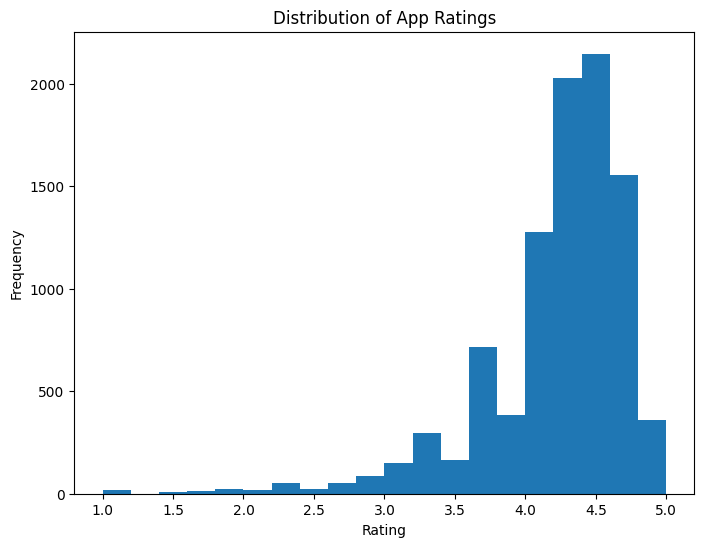

In [43]:
# Distribution of app ratings
df['Rating'].plot(kind='hist', bins=20, figsize=(8, 6))
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [45]:
# Average ratings by category
avg_ratings_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
avg_ratings_by_category


Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335987
PARENTING              4.300000
GAME                   4.286326
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.277104
SHOPPING               4.259664
SOCIAL                 4.255598
WEATHER                4.244000
SPORTS                 4.223511
PRODUCTIVITY           4.211396
HOUSE_AND_HOME         4.197368
FAMILY                 4.192272
PHOTOGRAPHY            4.192114
AUTO_AND_VEHICLES      4.190411
MEDICAL                4.189143
LIBRARIES_AND_DEMO     4.178462
FOOD_AND_DRINK         4.166972
COMMUNICATION          4.158537
COMICS                 4.155172
NEWS_AND_MAGAZINES     4.132189
FINANCE                4.131889
ENTERTAINMENT          4.126174
BUSINESS               4.121452
TRAVEL_AND_LOCAL       4.109292
LIFESTYLE              4.094904
VIDEO_PLAYERS          4.063750
MAPS_AND_NAVIGATION    4.051613

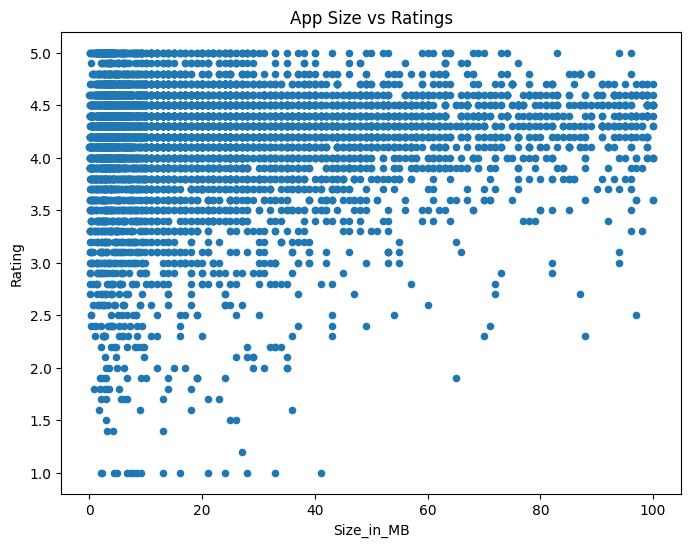

In [47]:
# Correlation between app size and ratings
df.plot.scatter(x='Size_in_MB', y='Rating', figsize=(8, 6))
plt.title('App Size vs Ratings')
plt.xlabel('Size_in_MB')
plt.ylabel('Rating')
plt.show()

In [50]:
# Most installed apps and their categories
most_installed_apps = df.nlargest(10, 'Installs')[['App', 'Category', 'Installs']]
most_installed_apps


,App,Category,Installs
152,Google Play Books,BOOKS_AND_REFERENCE,1000000000
335,Messenger – Text and Video Chat for Free,COMMUNICATION,1000000000
336,WhatsApp Messenger,COMMUNICATION,1000000000
338,Google Chrome: Fast & Secure,COMMUNICATION,1000000000
340,Gmail,COMMUNICATION,1000000000
341,Hangouts,COMMUNICATION,1000000000
381,WhatsApp Messenger,COMMUNICATION,1000000000
382,Messenger – Text and Video Chat for Free,COMMUNICATION,1000000000
386,Hangouts,COMMUNICATION,1000000000
391,Skype - free IM & video calls,COMMUNICATION,1000000000
